In [1]:
import wdlen
from nltk.corpus.reader import CHILDESCorpusReader
import slope
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Providence = CHILDESCorpusReader(corpus_root, 'Providence-xml/.*.xml')
wdlen_list = wdlen.wordlenth(Providence)

In [7]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

## With one word utterances before adjusting ages

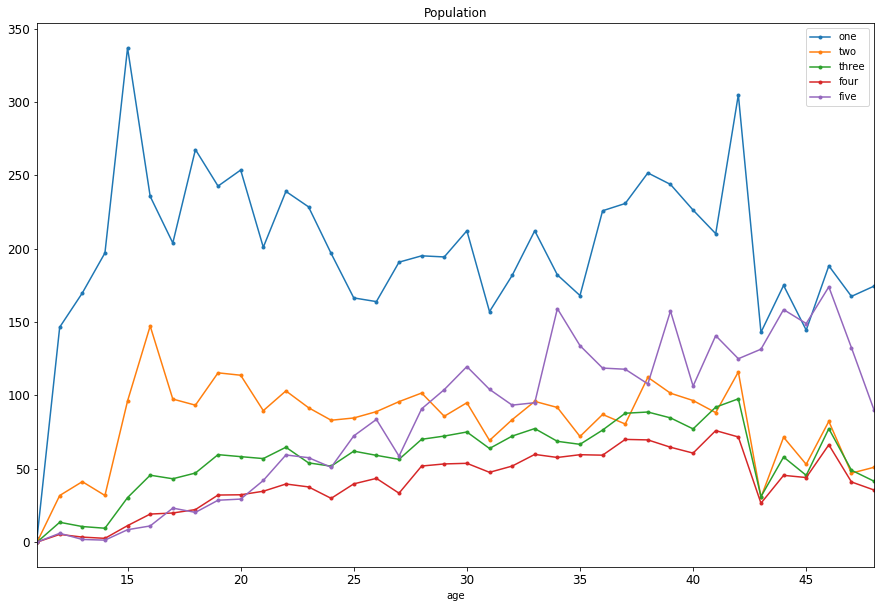

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [9]:
df_per = df

In [10]:
df_per['sum'] = df_per.loc[:, 'one':'five'].sum(axis = 1)

In [11]:
df_per.loc[:, "one":"five"] = df_per.loc[:,"one":"five"].div(df_per["sum"], axis=0)

In [12]:
df_per = df_per.drop('sum', axis = 1)

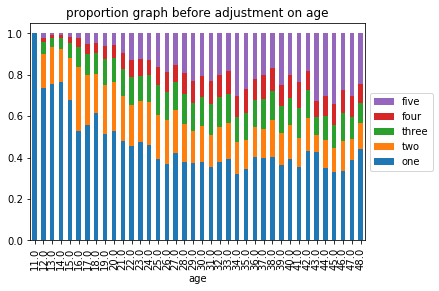

In [13]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Without one-word utterances before adjusting ages

In [14]:
df_no1 = df.drop('one', axis = 1)

In [15]:
df_no1per = df_no1

In [16]:
df_no1per['sum'] = df_no1per.loc[:, 'two':'five'].sum(axis = 1)

In [18]:
df_no1per.loc[:, "two":"five"] = df_no1per.loc[:,"two":"five"].div(df_no1per["sum"], axis=0)

In [19]:
df_no1per = df_no1per.drop('sum', axis = 1)

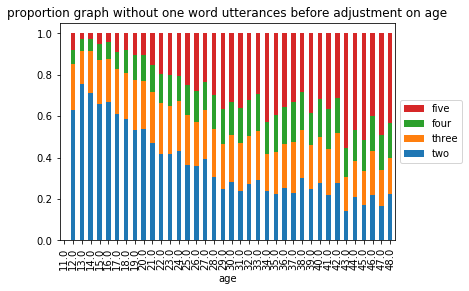

In [20]:
ax = df_no1per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph without one word utterances before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## With one-word utterances after adjusting ages

In [24]:
df_age1 = df.groupby('age').count()

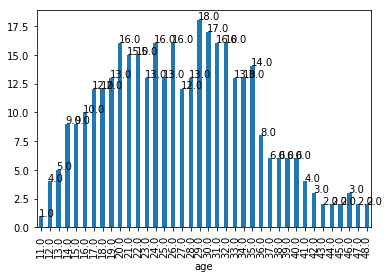

In [27]:
# Before coelescing ages
ax = df_age1['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [2]:
df_age = pd.read_excel('Providence.xlsx')

In [5]:
df_age2 = df_age.groupby('age.1').count()

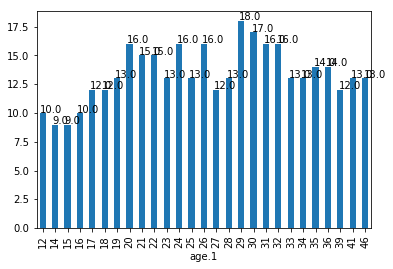

In [30]:
# After coelescing ages
ax = df_age2['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [3]:
df_perage = df_age

In [4]:
df_perage = df_perage.drop('age', axis = 1)

In [5]:
df_perage['sum'] = df_perage.loc[:, 'one':'five'].sum(axis = 1)

In [6]:
df_perage.loc[:, 'one':'five'] = df_perage.loc[:, 'one':'five'].div(df_perage['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

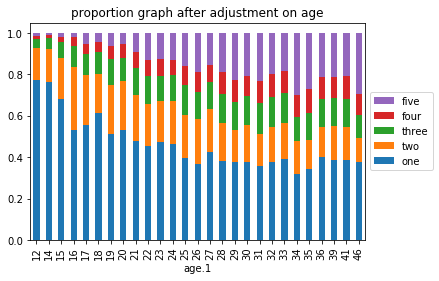

In [39]:
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph after adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [7]:
df_mean_s = df_perage.groupby('age.1').mean()

point:  [12.         15.99999999 46.        ]
F1:  2.5023009054994234 F2:  54.98044991909137
F seg linear:  [12.98078806]


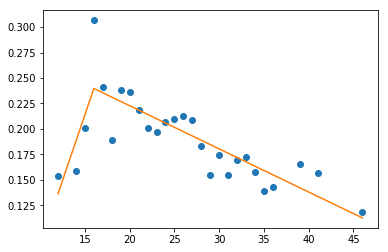

In [8]:
slope.seg_reg(df_mean_s)  # F = 2.6896

## Without one word utterances after adjusting ages

In [3]:
df_ageno1 = df_age.drop('one', axis = 1)

In [4]:
df_perageno1 = df_ageno1.drop('age', axis = 1)

In [5]:
df_perageno1['sum'] = df_perageno1.loc[:, 'two':'five'].sum(axis = 1)

In [6]:
df_perageno1.loc[:, 'two':'five'] = df_perageno1.loc[:, 'two':'five'].div(df_perageno1['sum'], axis = 0)
df_perageno1 = df_perageno1.drop(['sum'], axis = 1).dropna()

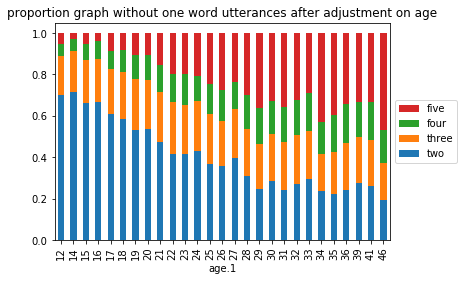

In [15]:
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph without one word utterances after adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## percentage without three and more word utterances

In [27]:
df_no3 = df_age.loc[:, 'fname':'two']

In [28]:
df_no3 = df_no3.drop(['age'], axis = 1)

In [29]:
df_no3['sum'] = df_no3.loc[:, 'one':'two'].sum(axis = 1)

In [30]:
df_no3.loc[:, "one":"two"] = df_no3.loc[:,"one":"two"].div(df_no3["sum"], axis=0)

In [31]:
df_no3 = df_no3.drop(['sum'], axis = 1)

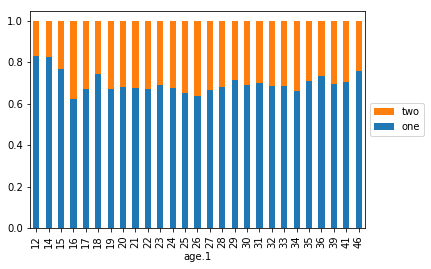

In [32]:
ax = df_no3.groupby('age.1').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

point:  [12.         16.20429598 46.        ]
F1:  4.429370080774346 F2:  5.2598507694768
F seg linear:  [19.49795371]


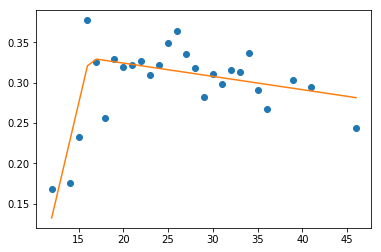

In [34]:
slope.seg_reg(df_no3.groupby('age.1').mean())

## plot per child

In [7]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [13]:
df_perageno1

,fname,age.1,two,three,four,five
1,Providence-xml/Ethan/001121.xml,12,0.785714,0.142857,0.000000,0.071429
2,Providence-xml/Ethan/010006.xml,12,0.727273,0.242424,0.030303,0.000000
3,Providence-xml/Naima/001126.xml,12,0.428571,0.300000,0.142857,0.128571
4,Providence-xml/Naima/010014.xml,12,0.568807,0.211009,0.091743,0.128440
5,Providence-xml/Ethan/010021.xml,12,0.794521,0.123288,0.054795,0.027397
6,Providence-xml/Ethan/010105.xml,12,0.883333,0.100000,0.016667,0.000000
7,Providence-xml/Lily/010102.xml,12,0.952381,0.000000,0.047619,0.000000
8,Providence-xml/Naima/010026.xml,12,0.492308,0.353846,0.076923,0.076923
9,Providence-xml/Naima/010111.xml,12,0.651515,0.227273,0.090909,0.030303
10,Providence-xml/Ethan/010117.xml,14,0.836066,0.163934,0.000000,0.000000


In [8]:
df_perageno1['corpus'] = df_perageno1['fname']

In [15]:
df_perageno1

,fname,age.1,two,three,four,five,corpus
1,Providence-xml/Ethan/001121.xml,12,0.785714,0.142857,0.000000,0.071429,Providence-xml/Ethan/001121.xml
2,Providence-xml/Ethan/010006.xml,12,0.727273,0.242424,0.030303,0.000000,Providence-xml/Ethan/010006.xml
3,Providence-xml/Naima/001126.xml,12,0.428571,0.300000,0.142857,0.128571,Providence-xml/Naima/001126.xml
4,Providence-xml/Naima/010014.xml,12,0.568807,0.211009,0.091743,0.128440,Providence-xml/Naima/010014.xml
5,Providence-xml/Ethan/010021.xml,12,0.794521,0.123288,0.054795,0.027397,Providence-xml/Ethan/010021.xml
6,Providence-xml/Ethan/010105.xml,12,0.883333,0.100000,0.016667,0.000000,Providence-xml/Ethan/010105.xml
7,Providence-xml/Lily/010102.xml,12,0.952381,0.000000,0.047619,0.000000,Providence-xml/Lily/010102.xml
8,Providence-xml/Naima/010026.xml,12,0.492308,0.353846,0.076923,0.076923,Providence-xml/Naima/010026.xml
9,Providence-xml/Naima/010111.xml,12,0.651515,0.227273,0.090909,0.030303,Providence-xml/Naima/010111.xml
10,Providence-xml/Ethan/010117.xml,14,0.836066,0.163934,0.000000,0.000000,Providence-xml/Ethan/010117.xml


In [9]:
df_perageno1['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)

In [19]:
df_perageno1

,fname,age.1,two,three,four,five,corpus
1,Providence-xml/Ethan/001121.xml,12,0.785714,0.142857,0.000000,0.071429,Providence-xml/Ethan
2,Providence-xml/Ethan/010006.xml,12,0.727273,0.242424,0.030303,0.000000,Providence-xml/Ethan
3,Providence-xml/Naima/001126.xml,12,0.428571,0.300000,0.142857,0.128571,Providence-xml/Naima
4,Providence-xml/Naima/010014.xml,12,0.568807,0.211009,0.091743,0.128440,Providence-xml/Naima
5,Providence-xml/Ethan/010021.xml,12,0.794521,0.123288,0.054795,0.027397,Providence-xml/Ethan
6,Providence-xml/Ethan/010105.xml,12,0.883333,0.100000,0.016667,0.000000,Providence-xml/Ethan
7,Providence-xml/Lily/010102.xml,12,0.952381,0.000000,0.047619,0.000000,Providence-xml/Lily
8,Providence-xml/Naima/010026.xml,12,0.492308,0.353846,0.076923,0.076923,Providence-xml/Naima
9,Providence-xml/Naima/010111.xml,12,0.651515,0.227273,0.090909,0.030303,Providence-xml/Naima
10,Providence-xml/Ethan/010117.xml,14,0.836066,0.163934,0.000000,0.000000,Providence-xml/Ethan


In [10]:
children = df_perageno1.corpus.unique()

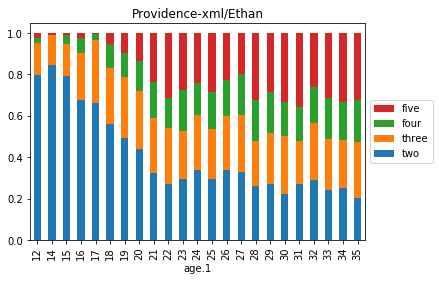

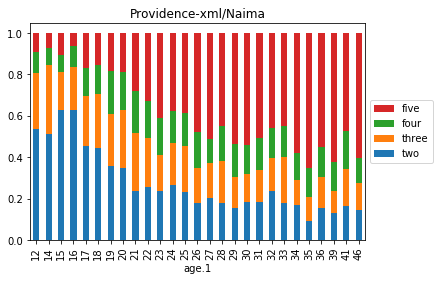

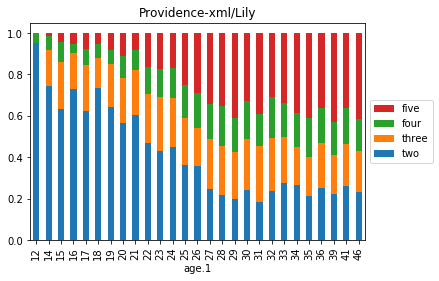

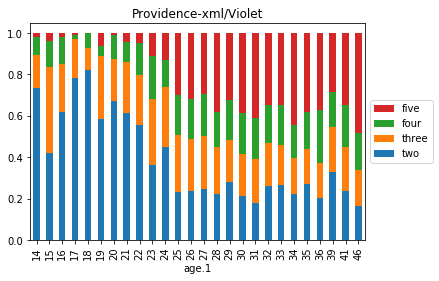

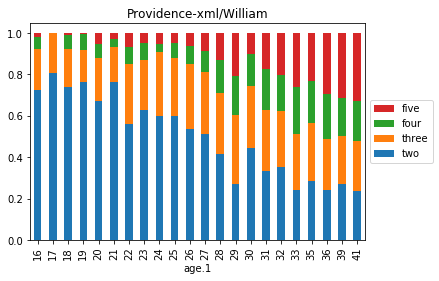

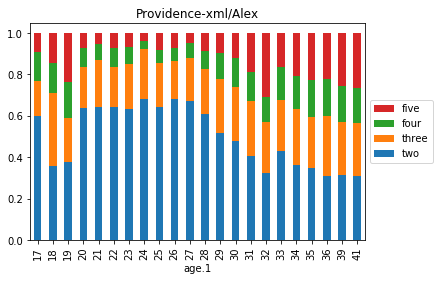

In [23]:
for child in children:   
    per_child(df_perageno1, child, 'age.1')

# segmented regression

## Overall segmented regression (after adjusting ages)

In [3]:
df_mean = pd.read_excel('df mean providence.xlsx').set_index('age.1')

point:  [12.         29.01295576 46.        ]
F1:  347.41717245978043 F2:  3.7516314274280926
F seg linear:  [50.88065706]


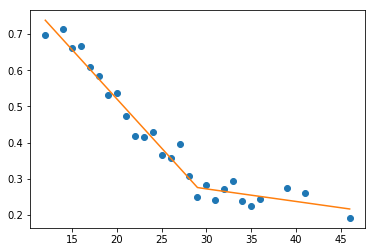

In [4]:
slope.seg_reg(df_mean)

## segmented regression per child

point:  [12. 22. 35.]
F1:  96.5337464410288 F2:  8.887133993233364
F seg linear:  [44.32757717]


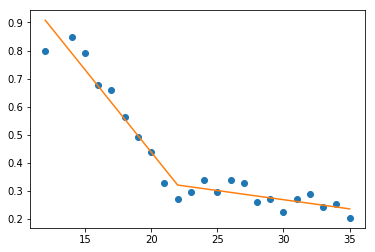

Providence-xml/Ethan None
point:  [12.         23.45519896 46.        ]
F1:  30.756386501201696 F2:  9.582270009004072
F seg linear:  [22.61839871]


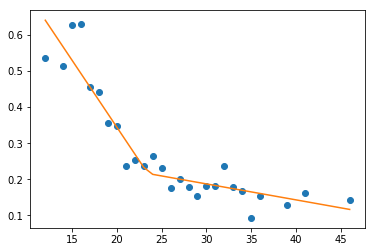

Providence-xml/Naima None
point:  [12.         28.63803089 46.        ]
F1:  154.22573291670233 F2:  0.45682267457723374
F seg linear:  [49.78899293]


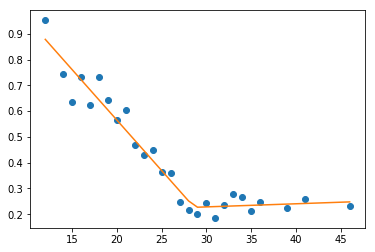

Providence-xml/Lily None
point:  [14.         27.99999999 46.        ]
F1:  16.15493104255783 F2:  0.26160569555178076
F seg linear:  [7.41806144]


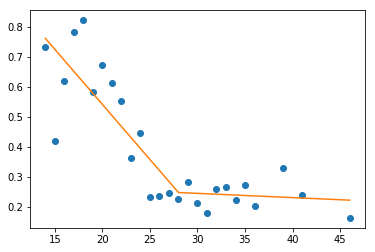

Providence-xml/Violet None
point:  [16.         33.31549233 41.        ]
F1:  120.69538696448522 F2:  0.69560336393775
F seg linear:  [4.58869857]


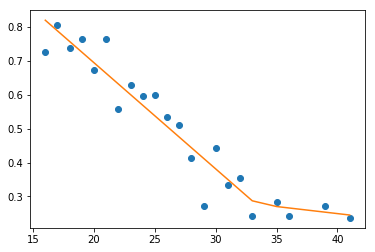

Providence-xml/William None
point:  [17.         23.67852652 41.        ]
F1:  2.2196309188888894 F2:  63.139064021239726
F seg linear:  [10.85167606]


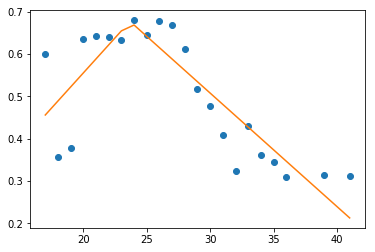

Providence-xml/Alex None


In [11]:
for child in children:
    print(child, slope.seg_reg_child(df_perageno1,child))    
    # can't calculate slope for last two children due to limited data